<a href="https://colab.research.google.com/github/Dhanush-Poduval/spamdetection_model/blob/main/spamDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install langdetect
!pip install wordcloud




In [5]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url ,sep='\t',header=None ,  names=['labels','messages'])
df.head(5)

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.isna().sum()


,0
labels,0
messages,0


In [17]:
import langdetect
def get_lang(text):
  try:
    return langdetect.detect(text)
  except:
    return "uknown"
df["lang"]=df["messages"].apply(get_lang)

<Axes: xlabel='lang'>

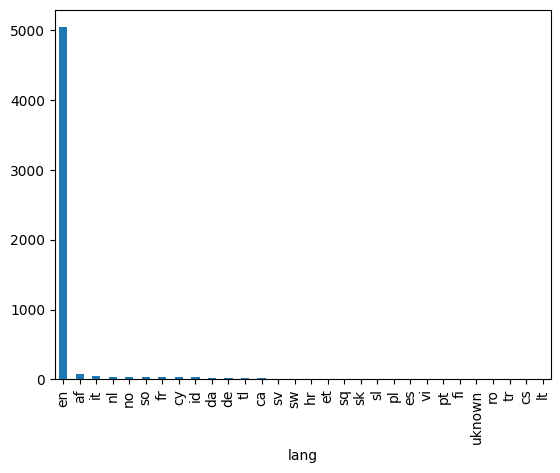

In [18]:


df["lang"].value_counts().plot(kind='bar')

In [21]:
pos=df[df['lang']!='en'].index
only_eng=df.drop(index=pos)
only_eng["lang"].unique()

array(['en'], dtype=object)

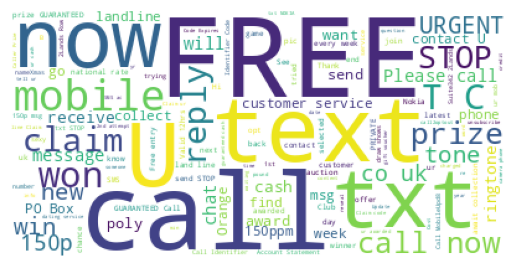

In [23]:
def generate_wordcloud(text):
  from wordcloud import WordCloud , STOPWORDS
  import matplotlib.pyplot as plt
  wordcloud=WordCloud(stopwords=STOPWORDS , background_color='white').generate(text)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

spam = only_eng[only_eng['labels']=='spam']
all_spam = " ".join(spam["messages"])
generate_wordcloud(all_spam)